In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Colab Notebooks/sentiment analysis

/content/drive/MyDrive/Colab Notebooks/sentiment analysis


In [ ]:
import pandas as pd
import numpy as np

#Process amazon

In [ ]:
# process amazon
amz_df = pd.read_csv('./dataset/amazon_cells_labelled.txt', sep="\t", header=None)
amz_df.columns = ["Text","Label"]

In [ ]:
from sklearn.model_selection import train_test_split

amz_x = amz_df['Text']
amz_y = amz_df['Label']

x_train, x_test, y_train, y_test = train_test_split(amz_x, amz_y, test_size = 0.2, random_state=101)

In [ ]:
train_amz = pd.concat([x_train, y_train],axis=1).reset_index(drop=True)
test_amz = pd.concat([x_test, y_test],axis=1).reset_index(drop=True)

#Process imdb

In [ ]:
# process imdb
imdb_df = pd.read_csv('./dataset/merge.csv')

In [ ]:
imdb_df = imdb_df[imdb_df['ID']=='Imdb']

In [ ]:
imdb_x = imdb_df['Text']
imdb_y = imdb_df['Label'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(imdb_x, imdb_y, test_size = 0.2, random_state=101)
train_imdb = pd.concat([x_train, y_train],axis=1).reset_index(drop=True)
test_imdb = pd.concat([x_test, y_test],axis=1).reset_index(drop=True)

#Process yelp

In [ ]:
# process imdb
yelp_df = pd.read_csv('./dataset/yelp_labelled.txt', sep="\t", header=None)
yelp_df.columns = ["Text","Label"]

In [ ]:
yelp_x = yelp_df['Text']
yelp_y = yelp_df['Label']

x_train, x_test, y_train, y_test = train_test_split(yelp_x, yelp_y, test_size = 0.2, random_state=101)
train_yelp = pd.concat([x_train, y_train],axis=1).reset_index(drop=True)
test_yelp = pd.concat([x_test, y_test],axis=1).reset_index(drop=True)

#Merge train

In [ ]:
merged_train_df = pd.concat([train_amz, train_imdb, train_yelp]).reset_index(drop=True)

In [ ]:
merged_test_df = pd.concat([test_amz, test_imdb, test_yelp]).reset_index(drop=True)

In [ ]:
merged_train_df

,Text,Label
0,I'm using it with an iriver SPINN (with case) ...,1
1,This item is fantastic and works perfectly!,1
2,its extremely slow and takes forever to do any...,0
3,"The cable looks so thin and flimsy, it is scary.",0
4,I cannot make calls at certain places.,0
...,...,...
2395,"The pizza tasted old, super chewy in not a goo...",0
2396,Food is way overpriced and portions are fuckin...,0
2397,"The burger... I got the ""Gold Standard"" a $17 ...",0
2398,first time there and might just be the last.,0


In [ ]:
merged_test_df

,Text,Label
0,"No shifting, no bubbling, no peeling, not even...",1
1,Customer service was terrible.,0
2,I purcashed this for the car charger and it do...,0
3,I don't like this Nokia either.,0
4,Not impressed.,0
...,...,...
595,We got the food and apparently they have never...,0
596,My ribeye steak was cooked perfectly and had g...,1
597,Only Pros : Large seating area/ Nice bar area/...,1
598,The classic Maine Lobster Roll was fantastic.,1


In [ ]:
merged_train_df.to_csv('merged_train.csv')

In [ ]:
merged_test_df.to_csv('merged_test.csv')

#CNN

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
# train_df = pd.read_csv('merged_train.csv')
# test_df = pd.read_csv('merged_test.csv')

In [ ]:
# X_text = test_df['Text']
# y_test = test_df['Label']

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(train_df['Text'], train_df['Label'], test_size = 0.1, shuffle = True, random_state = 100)

In [ ]:
# process imdb
yelp_df = pd.read_csv('./dataset/yelp_labelled.txt', sep="\t", header=None)
yelp_df.columns = ["Text","Label"]

# process imdb
imdb_df = pd.read_csv('./dataset/merge.csv')
imdb_df = imdb_df[imdb_df['ID']=='Imdb'].drop('ID',axis=1)

# process amazon
amz_df = pd.read_csv('./dataset/amazon_cells_labelled.txt', sep="\t", header=None)
amz_df.columns = ["Text","Label"]

In [ ]:
df = pd.concat([yelp_df, imdb_df, amz_df]).reset_index(drop=True)
df

,Text,Label
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0
...,...,...
2995,The screen does get smudged easily because it ...,0.0
2996,What a piece of junk.. I lose more calls on th...,0.0
2997,Item Does Not Match Picture.,0.0
2998,The only thing that disappoint me is the infra...,0.0


In [ ]:
# new data
df = pd.read_csv('relabeled.csv')
df = df[df['ID']=='Imdb']

In [ ]:
sentences = df['Text'].values
y = df['Label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                    test_size=0.20, 
                                                                    random_state=1000, 
                                                                    shuffle=True)

In [ ]:
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences, y, test_size=0.2, random_state=1000)
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences_train, y_train, test_size=0.2, random_state=1000)


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
X_val = tokenizer.texts_to_sequences(sentences_val)


vocab_size = len(tokenizer.word_index) + 1
maxlen = 100


X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

In [ ]:
X_train[0].shape

(100,)

In [ ]:
embedding_dim = 100

EMB_CNN.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
EMB_CNN.add(layers.Conv1D(128, 5, activation='relu'))
EMB_CNN.add(layers.GlobalMaxPooling1D())
EMB_CNN.add(layers.Dense(10, activation='relu'))
EMB_CNN.add(layers.Dense(2, activation='softmax'))

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_val, y_val),
                    batch_size=10)

Epoch 1/20
192/192 [==============================] - 42s 210ms/step - loss: 0.6943 - accuracy: 0.4833 - val_loss: 0.6933 - val_accuracy: 0.4733
Epoch 2/20
192/192 [==============================] - 36s 189ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.4733
Epoch 3/20
 86/192 [============>.................] - ETA: 21s - loss: 0.6928 - accuracy: 0.5256

KeyboardInterrupt: ignored

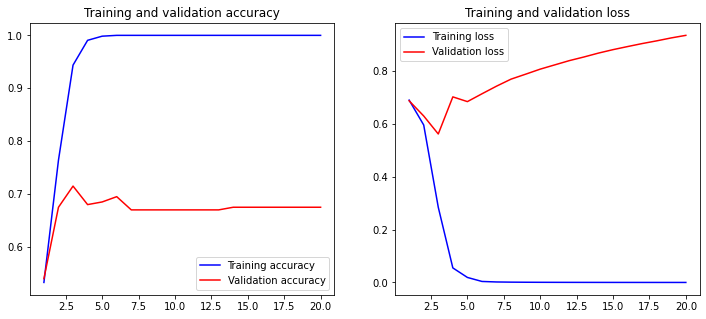

In [ ]:
plot_history(history)

In [ ]:
cnn_ori = {}
cnn_ori['train_loss'] = history.history['loss']
cnn_ori['train_acc'] = history.history['accuracy']
cnn_ori['test_loss'] = history.history['val_loss']
cnn_ori['test_acc'] = history.history['val_accuracy']

In [ ]:
cnn_ori_df = pd.DataFrame.from_dict(cnn_ori,orient='index').T

In [ ]:
cnn_ori_df.to_csv('CNN_new_imdb_result.csv')

In [ ]:
cnn_new = {}
cnn_new['train_loss'] = history.history['loss']
cnn_new['train_acc'] = history.history['accuracy']
cnn_new['test_loss'] = history.history['val_loss']
cnn_new['test_acc'] = history.history['val_accuracy']

In [ ]:
cnn_new_df = pd.DataFrame.from_dict(cnn_new,orient='index').T

In [ ]:
cnn_new_df.to_csv('CNN_new_result.csv')

#LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# Pytorch Imports
import torch
import torch.nn as nn
import torch.utils.data
from torch.autograd import Variable

import time

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score,classification_report,accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Embedding, BatchNormalization
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import text
from keras_preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
nltk.download('punkt')

from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# process imdb
yelp_df = pd.read_csv('./dataset/yelp_labelled.txt', sep="\t", header=None)
yelp_df.columns = ["Text","Label"]

# process imdb
imdb_df = pd.read_csv('./dataset/merge.csv')
imdb_df = imdb_df[imdb_df['ID']=='Imdb'].drop('ID',axis=1)

# process amazon
amz_df = pd.read_csv('./dataset/amazon_cells_labelled.txt', sep="\t", header=None)
amz_df.columns = ["Text","Label"]
df = pd.concat([yelp_df, imdb_df, amz_df]).reset_index(drop=True)

In [ ]:
df = pd.read_csv('relabeled.csv')
df = df[df['ID']=='Imdb']
# sentences = df['Text'].values
# y = df['Label'].values

In [ ]:
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(df.New_Label.values)

In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(df.Text.values, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [ ]:
xtrain.shape

(800,)

In [ ]:
# embeddings_index = {}
# f = open('../text/glove.840B.300d.txt')
# for line in tqdm(f):
#     values = line.split(" ")
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

2196017it [02:00, 18162.12it/s]

Found 2196016 word vectors.


In [ ]:
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())


In [ ]:
# create sentence vectors using the above function for training and validation set
xtrain_glove = [sent2vec(x) for x in tqdm(xtrain)]
xvalid_glove = [sent2vec(x) for x in tqdm(xvalid)]

100%|██████████| 200/200 [00:00<00:00, 4881.89it/s]


In [ ]:
xtrain_glove = np.array(xtrain_glove)
xvalid_glove = np.array(xvalid_glove)

In [ ]:
xtrain_glove.shape

(800, 300)

In [ ]:
scl = preprocessing.StandardScaler()
xtrain_glove_scl = scl.fit_transform(xtrain_glove)
xvalid_glove_scl = scl.transform(xvalid_glove)

In [ ]:
ytrain_enc = np_utils.to_categorical(ytrain)
yvalid_enc = np_utils.to_categorical(yvalid)

In [ ]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 70

token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)

# zero pad the sequences
xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

In [ ]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector =  embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 3130/3130 [00:00<00:00, 338363.66it/s]


In [ ]:
xtrain_pad.shape

(800, 70)

In [ ]:
# A simple LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')


In [ ]:
history = model.fit(xtrain_pad, y=ytrain_enc, batch_size=64, epochs=20, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Epoch 1/20
13/13 [==============================] - 11s 634ms/step - loss: 0.7369 - accuracy: 0.4975 - val_loss: 0.6832 - val_accuracy: 0.5450
Epoch 2/20
13/13 [==============================] - 4s 276ms/step - loss: 0.7037 - accuracy: 0.5100 - val_loss: 0.6711 - val_accuracy: 0.6600
Epoch 3/20
13/13 [==============================] - 4s 288ms/step - loss: 0.6911 - accuracy: 0.5550 - val_loss: 0.6583 - val_accuracy: 0.7100
Epoch 4/20
13/13 [==============================] - 5s 357ms/step - loss: 0.6657 - accuracy: 0.6000 - val_loss: 0.6302 - val_accuracy: 0.7250
Epoch 5/20
13/13 [==============================] - 3s 259ms/step - loss: 0.6303 - accuracy: 0.6325 - val_loss: 0.5817 - val_accuracy: 0.7450
Epoch 6/20
13/13 [==============================] - 4s 270ms/step - loss: 0.5875 - accuracy: 0.6900 - val_loss: 0.5196 - val_accuracy: 0.7550
Epoch 7/20
13/13 [==============================] - 3s 266ms/step - loss: 0.5503 - accuracy: 0.7400 - val_loss: 0.5467 - val_accuracy: 0.7100
Epoch

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

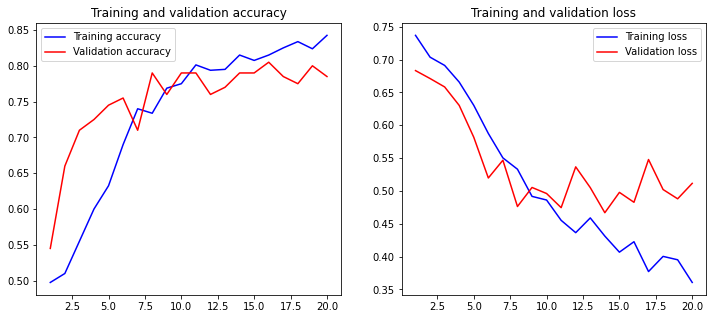

In [ ]:
plot_history(history)

In [ ]:
cnn_ori = {}
cnn_ori['train_loss'] = history.history['loss']
cnn_ori['train_acc'] = history.history['accuracy']
cnn_ori['test_loss'] = history.history['val_loss']
cnn_ori['test_acc'] = history.history['val_accuracy']
cnn_ori_df = pd.DataFrame.from_dict(cnn_ori,orient='index').T
cnn_ori_df.to_csv('LSTM_new_imdb_result.csv')